## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [1]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [2]:
import DiadFit as pf
pf.__version__

'0.0.12dev'

## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [3]:
wavelength =532.05 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,818.558217,5000.0,556.27662
9,1116.945682,5000.0,565.66588
16,1310.338900,5000.0,571.92248
19,1398.773828,5000.0,574.82985
23,1447.423317,7000.0,576.44188


## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [4]:
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=1117, line2_shift=1447,
                                     cut_off_intensity=2000)

## Find your files

In [11]:
mypath=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\BenBlack'
filetype='head_csv'
# Put the common string you can in all your Ne lines here
ID_str='Ne'
file_ext='csv' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=None # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=mypath, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [6]:
Ne_files

['003_Ne_02.csv']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [7]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect

Biggest 6 peaks:


,pos,height
50,1444.342318,15381.666990
43,1395.931204,3967.000000
65,1563.844689,3620.333252
7,1113.926895,1986.333374
24,1216.749032,1514.000000
33,1307.388779,1247.000000


selected Peak 1 Pos
1113.926895
selected Peak 2 Pos
1444.342318


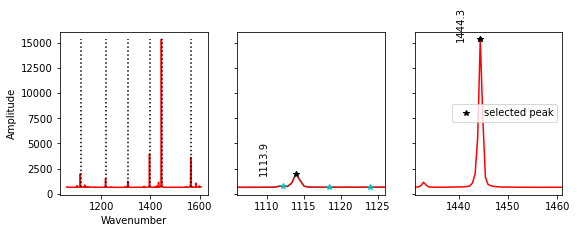

In [8]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=1116
peak2_cent=1446


Ne, df_sort_Ne_trim, nearest_1117, nearest_1447=pf.plot_Ne_lines(path=mypath, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## Now tweak the fit for this 1 example
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min)
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override, 

In [27]:
# If fit really bad, try tweaking the amplitude here
amplitude=100

#If you are fitting the 1117 peak, you may need 2, else set to 1
peaks_1=2
# Determines how far from the peak center the 2nd peak is. 
LH_offset_mini=[2, 5]


#x_range - Determins how much outside your selected background position the baseline plot shows
x_range_baseline=20
# Y range- Determins how much y axis you get above the baseline on the plot
y_range_baseline=200

# Can either set this as none, in which case it fits between the background positions,
#or decide exactly how many wavenumbers either side of the peak position 
# above you want the voigt routine to fit
# E.g. here, fitting 5 to the left, 5 to the right for Peak 1
x_span_pk1_override=[-5, 5]
# And -6 to the left, 6 to the right of Peak2
x_span_pk2_override=[-6, 6]

# Sets x lim for peak fit top plot, if None, uses range of x of fitting data, can override
x_range_peak=5

# Set the background positions, e.g. how many units left or right of the peak you want the background
back=(lower_bck_pk1=[-50, -10], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80])


# To see other parameters you can tweak, do help(pf.fit_Ne_lines) if this isn't working fo your spectra. 
df_test, Ne_1117_reg_x_plot, Ne_1117_reg_y_plot=pf.fit_Ne_lines(
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    LH_offset_mini=LH_offset_mini, peaks_1=peaks_1,
    Ne_center_1=nearest_1117, Ne_center_2=nearest_1447,
    lower_bck_pk1=lower_bck_pk1, upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
    lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
    amplitude=amplitude, x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
    x_span_pk1_override=x_span_pk1_override,
    x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak, DeltaNe_ideal=ideal_split['Ne_Split'])
    df_test


SyntaxError: invalid syntax (3665237127.py, line 27)

In [23]:
def test_func(lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80], amplitude=100):
    test=lower_bck_pk1[0]+upper_bck1_pk2[1]+amplitude
    return test


back=dict(lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80])

test_func(**back, amplitude=50)

50

In [30]:
from typing import Tuple, Optional

@dataclass
class Ne_peak_config:
    Ne_center_1: float = 1117.1
    N_poly_1_baseline: float = 1
    x_span_1: Tuple[float, float] = (-10, 8)
    LH_offset_mini: Tuple[float, float] = (1.5, 3)
    peaks_1: float = 2
    lower_bck_pk1: Tuple[float, float] = (-50, -25)
    upper_bck1_pk1: Tuple[float, float] = (8, 15)
    upper_bck2_pk1: Tuple[float, float] = (30, 50)
    Ne_center_2: float = 1147
    N_poly_2_baseline: float = 1
    x_span_2: Tuple[float, float] = (-5, 5)
    x_span_pk1_override: Optional [Tuple[float, float]] = None
    x_span_pk2_override: Optional [Tuple[float, float]] = None
    lower_bck_pk2: Tuple[float, float] = (-44.2, -22)
    upper_bck1_pk2: Tuple[float, float] = (15, 50)
    upper_bck2_pk2: Tuple[float, float] = (50, 51)
    amplitude: float = 100
    DeltaNe_ideal: float = 330.477634
    


# plot_figure=True, print_report=False, loop=False, x_range_baseline=100, y_range_baseline=1000, x_range_peak=None,  Ne=None, filename=None, path=None, prefix=True,

In [33]:
c=Ne_peak_config()
c.amplitude=20
c

Ne_peak_config(Ne_center_1=1117.1, N_poly_1_baseline=1, x_span_1=(-10, 8), LH_offset_mini=(1.5, 3), peaks_1=2, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), Ne_center_2=1147, N_poly_2_baseline=1, x_span_2=(-5, 5), x_span_pk1_override=None, x_span_pk2_override=None, lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), amplitude=20, DeltaNe_ideal=330.477634)

In [34]:
Ne_peak_config(amplitude=20)

Ne_peak_config(Ne_center_1=1117.1, N_poly_1_baseline=1, x_span_1=(-10, 8), LH_offset_mini=(1.5, 3), peaks_1=2, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), Ne_center_2=1147, N_poly_2_baseline=1, x_span_2=(-5, 5), x_span_pk1_override=None, x_span_pk2_override=None, lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), amplitude=20, DeltaNe_ideal=330.477634)

In [ ]:
def fit_Ne_lines_Eric(*, config: Ne_peak_config=Ne_peak_config(), Ne=None, filename=None, path=None, prefix=True,
plot_figure=True, print_report=False, loop=False, x_range_baseline=100, y_range_baseline=1000, x_range_peak=None, DeltaNe_ideal=330.477634):
    pf.fit_Ne_lines(
    

In [ ]:
def fit_Ne_lines_Eric(config: Ne_peak_config,
    Ne=Ne, filename=filename, path=mypath, prefix=prefix,
    x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
    x_span_pk1_override=x_span_pk1_override,
    x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak, DeltaNe_ideal=ideal_split['Ne_Split'])


    df_test


In [ ]:
    y_corr_1117, Py_base_1117, x_1117, Ne_short_1117, Py_base_1117, Baseline_ysub_1117, Baseline_x_1117=remove_Ne_baseline_1117(Ne, Ne_center_1=config.Ne_center_1,
    N_poly_1117_baseline=config.N_poly_1_baseline,
    lower_bck=config.lower_bck_pk1, upper_bck1=config.upper_bck1_pk1, upper_bck2=config.upper_bck2_pk1)

In [25]:
from dataclasses import dataclass


In [26]:
@dataclass
class peak:
    bck1: List[int]
    bck2: List[int]
    

SyntaxError: unexpected EOF while parsing (3822990779.py, line 1)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [ ]:
plot_figure=True # Means doesnt make figures, lot faster. 
save_excel=True # Saves to excel
save_clipboard=True # Copies to clipboard

df = pd.DataFrame([])
for i in range(0, len(Ne_files)):
    
    filename=Ne_files[i]
    Ne=pf.get_data(path=path, filename=filename, filetype=filetype)
    print('working on ' + str(Ne_files[i]))

    data=pf.fit_Ne_lines(Ne=Ne, filename=filename, path=path, prefix=prefix,
                         
                         
LH_offset_mini=LH_offset_mini, peaks_1=peaks_1, Ne_center_1=nearest_1117,
lower_bck_pk1=[-50, -25], upper_bck1_pk1=[8, 13], upper_bck2_pk1=[50, 80],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],                         
Ne_center_2=nearest_1447, amplitude=amplitude, 
x_range_baseline=x_range_baseline, y_range_baseline=y_range_baseline, 
x_span_pk1_override=x_span_pk1_override,
x_span_pk2_override=x_span_pk2_override, x_range_peak=x_range_peak,                         
plot_figure=plot_figure, loop=True, DeltaNe_ideal=ideal_split['Ne_Split'])
    
    



    df = df.append(data)
    
df.to_excel('Ne_Lines_fit_loop.xlsx')
df.to_clipboard(excel=True)

